INSTITUTO DE CIÊNCIAS MATEMÁTICAS E DE COMPUTAÇÃO
UNIVERSIDADE DE SÃO PAULO

Lui Franco Rocha - 10295558

Yan Crisóstomo Rohwedder - 9779263

Vinicius Ribeiro - 9779440

# Realizando classificações com a base de dados de COVID-19 do Brasil
Coletamos o banco de dados disponível em https://opendatasus.saude.gov.br/dataset/bd-srag-2020

Todas as informações relevantes sobre o banco de dados podem ser observadas pelo dicionário de dados presente em https://opendatasus.saude.gov.br/dataset/ae90fa8f-3e94-467e-a33f-94adbb66edf8/resource/8f571374-c555-4ec0-8e44-00b1e8b11c25/download/dicionario-de-dados-srag-hospitalizado-27.07.2020-final.pdf

Utilizamos os pacotes 'pandas', 'numpy' e funções do 'sklearn' disponíveis em python para auxiliar no tratamento e classificação dos dados.

Utilizamos o pacote matplotlib.pyplot para auxiliar na visualização dos dados


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Carregamos o banco diretamente do servidor em que está disponível
source = "https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2020/INFLUD-23-11-2020.csv"

#Lemos o banco utilizando a ferramenta do pandas para ler arquivos .csv
data = pd.read_csv(source, delimiter=";", low_memory=False)

print("Quantidade de linhas X Quantidade de colunas:" + str(data.shape[0]) + ' X ' + str(data.shape[1]))
data.head()

Quantidade de linhas X Quantidade de colunas:945460 X 154


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,VACINA,DT_UT_DOSE,MAE_VAC,DT_VAC_MAE,M_AMAMENTA,DT_DOSEUNI,DT_1_DOSE,DT_2_DOSE,ANTIVIRAL,TP_ANTIVIR,OUT_ANTIV,DT_ANTIVIR,HOSPITAL,DT_INTERNA,SG_UF_INTE,ID_RG_INTE,CO_RG_INTE,ID_MN_INTE,CO_MU_INTE,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,RAIOX_RES,RAIOX_OUT,DT_RAIOX,AMOSTRA,DT_COLETA,TP_AMOSTRA,OUT_AMOST,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO,OUT_ANIM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TOMO_OUT,DT_TOMO,TP_TES_AN,DT_RES_AN,RES_AN,POS_AN_FLU,TP_FLU_AN,POS_AN_OUT,AN_SARS2,AN_VSR,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA
0,21/01/2020,4,16/01/2020,3,RJ,NaN,NaN,RIO DE JANEIRO,330455,HOSPITAL SAO MATHEUS,6427138,F,20/03/1972,47,3,3047,5,1.0,NaN,4.0,BRASIL,1,RJ,NaN,NaN,RIO DE JANEIRO,330455.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,17/01/2020,1.0,16/01/2020,RJ,NaN,NaN,RIO DE JANEIRO,330455.0,1.0,16/01/2020,NaN,2.0,2.0,NaN,21/01/2020,1.0,21/01/2020,1.0,NaN,2.0,30/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,30/01/2020,13/03/2020,23/01/2020,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23/03/2020,13,09/03/2020,11,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL SANTA CATARINA,2688603,M,20/10/1977,42,3,3042,6,3.0,NaN,4.0,BRASIL,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,S,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,HIPERTENSAO,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,10/03/2020,1.0,10/03/2020,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,1.0,10/03/2020,10/03/2020,3.0,6.0,NaN,NaN,1.0,10/03/2020,1.0,NaN,2.0,10/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,12/03/2020,04/05/2020,23/03/2020,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21/03/2020,12,19/03/2020,12,MS,EX ARS DE CAMPO GRANDE,1975.0,CAMPO GRANDE,500270,PRONCOR,2599848,F,22/06/1970,49,3,3049,5,1.0,NaN,3.0,BRASIL,1,MS,EX ARS DE CAMPO GRANDE,1975.0,CAMPO GRANDE,500270.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,CEFALEIA E MIALGIA,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,MS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,21/03/2020,1.0,NaN,2.0,06/04/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,06/04/2020,06/04/2020,24/03/2020,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27/03/2020,13,17/03/2020,12,SC,CHAPECO,1553.0,CHAPECO,420420,HOSPITAL REGIONAL DO OESTE,2537788,M,08/09/1983,36,3,3036,6,1.0,NaN,3.0,BRASIL,1,SC,CHAPECO,1553.0,CHAPECO,420420.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,

# Verificando a distribuição dos dados

Temos agora um dataframe que possui um grande conjunto de elementos e uma alta dimensionalidade. Para podermos usar algoritmos de aprendizado para a classificação, precisamos verificar se é possível diminuir a dimensionalidade.

Por isso vamos verificar:
* quais colunas possuem grande quantidade de valores nulos
* quais colunas se referem à valores de data ou à códigos de localidade que se tornam redundantes 



In [ ]:
pd.set_option('display.max_colwidth',0)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

#Contando todos os valores nulos de cada coluna
data_null_count = np.unique((data.isna().sum() / data.shape[0])>0.7,return_counts=True)

print(data_null_count)


(array([False,  True]), array([87, 67]))


# Tratamento de dados nulos ou irrelevantes

Verificamos que existem colunas cuja proporção de valores nulos é maior que 70% do conjunto dos elementos. Isso significa que podemos abordar essas colunas de duas maneiras: ou removemos essas colunas e guardamos uma quantidade maior de dados, ou removemos todos os dados que são nulos nessas colunas e guardamos uma quantidade maior de colunas.

Como já verificamos que seria inviável remover todos os dados nulos dessas colunas, uma vez que isso acarreta em uma grande diminuição do conjunto de dados, vamos remover as colunas.

In [ ]:
#Removendo colunas que possuem mais do que 30% dos dados nulos
dd = data.dropna(axis=1,thresh=data.shape[0]*0.7)

#Removendo dados nulos
dd.dropna(axis=0,inplace=True)

#Removendo colunas de datas e códigos de localidade
for col in dd.columns:
  value,count = np.unique(dd[col],return_counts=True)
  #Códigos de localidade
  if 'CO_' in col:
    dd.drop(col,axis=1,inplace=True)
  elif 'COD_' in col:
    dd.drop(col,axis=1,inplace=True)
  
  #Códigos de datas
  elif 'DT_' in col:
    dd.drop(col,axis=1,inplace=True)
  elif 'SEM_' in col:
    dd.drop(col,axis=1,inplace=True)
  
  #Colunas que possuem valores 9 = 'Ignorado' (ver no dicionário)
  #Por não terem um valor agregado são irrelevantes para o aprendizado
  elif value[len(value)-1] == 9:
    if count[len(value)-1] >= dd.shape[0]*20:
      dd.drop(col,axis=1,inplace=True)
    else:
      dd = dd.query(col + '!=9')

print(dd.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(67917, 44)


# Tratamento de colunas não-numéricas

Existem algumas alternativas para tratar esses casos não-numéricos. Aqui usaremos o método "**Target Enconding**", que pega a média do valor alvo da classificação e a usa como novo valor numérico, representativo de determinado valor não-numérico daquela coluna.

Para isso precisamos definir nosso dado alvo. Temos dois alvos de interesse "CLASSI_FIN" e "EVOLUCAO". O primeiro nos revela se o caso do paciente é ou não de COVID-19 e o segundo revela se o paciente se recuperou ou se veio a óbito. 



In [ ]:
#Selecionando coluna de dados não-numéricos
dd_obj = dd.select_dtypes(include='object')

#Selecionando dado alvo
#alvo = "CLASSI_FIN"
alvo = "EVOLUCAO"

#Tratamento específico para o alvo "EVOLUCAO", junta todas as mortes em um só valor
dd['EVOLUCAO'] = dd['EVOLUCAO'].replace(3,2) 

#Para cada dado
for col in dd_obj.columns:
  # 1. Agrupar dados da coluna com a média do valor alvo e criar um dicionário para a conversão dos dados
  Encoded_Mean_Dict = dd.groupby([col])[alvo].mean().to_dict()
  # 2.Criar novas coluans para os dados no dataframe usando o dicionário
  dd[col + '_encoded'] = dd[col].map(Encoded_Mean_Dict)
#Removendo colunas não-numéricas
dd = dd.select_dtypes(exclude='object')

#Escolha dos atributos
atributos = list(dd.columns)
atributos.remove(alvo)

# Reescalando os dados

Faremos uma reescala dos atributos para melhorar o aprendizado do algoritmo ao não criar distâncias muito grandes entre os dados.

O método de reescala usado é o mínimo-máximo.


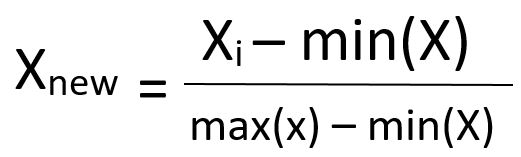

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dd)
dd = pd.DataFrame(scaler.transform(dd), columns=dd.columns)

print(dd)

       NU_IDADE_N  TP_IDADE  CS_GESTANT  CS_RACA  CS_ESCOL_N  CS_ZONA  SURTO_SG  NOSOCOMIAL  AVE_SUINO  FEBRE  TOSSE  GARGANTA  DISPNEIA  DESC_RESP  SATURACAO  DIARREIA  VOMITO  OUTRO_SIN  VACINA  ANTIVIRAL  HOSPITAL  UTI  SUPORT_VEN  AMOSTRA  TP_AMOSTRA  PCR_RESUL  CLASSI_FIN  CRITERIO  EVOLUCAO  HISTO_VGM  RES_AN  SG_UF_NOT_encoded  ID_REGIONA_encoded  ID_MUNICIP_encoded  ID_UNIDADE_encoded  CS_SEXO_encoded  ID_PAIS_encoded  SG_UF_encoded  ID_RG_RESI_encoded  ID_MN_RESI_encoded  FATOR_RISC_encoded  SG_UF_INTE_encoded  ID_RG_INTE_encoded  ID_MN_INTE_encoded
0      0.340909    1.0       0.833333    0.75     0.4         0.0      1.0       1.0         0.5        0.0    0.0    1.0       0.0       1.0        1.0        1.0       1.0     0.0        0.0     0.0        0.0       0.0  0.5         0.0      0.0         0.333333   0.75        0.0       0.0       0.0        0.75    0.066582           0.267385            0.267385            0.338880            0.000000         0.0              0.06

#Separando os dados para o cross-validation

Agora temos que realizar um último tratamento, balancear nossos dados. Pela COVID-19 ser uma doença com uma baixa letalidade, temos uma proporção maior de pessoas recuperadas do que de óbitos. Por isso temos que fazer algum tipo de balanceamento. O escolhido para esse caso foi o de fazer um down-sampling nos casos recuperados.

Após o balanceamento faremos a separação dos dados entre os dados de treino e os dados de validação

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

#Pelo balanceamento dos dados, em que temos muito mais dados de pessoas curadas do que de óbitos, faremos um down-sampling nos dados
sp_minoria = dd.query("EVOLUCAO == 1") #Minoria dos dados, em que o paciente morreu
sp_maioria = dd.query("EVOLUCAO == 0") #Maioria dos dados, em que o paciente sobreviveu

# print(sp_minoria.shape)
# print(sp_maioria.shape)

#Fazer down-samplig com os dados da maioria para equiparar ao tamanho de dados da minoria
sp_maioria = sp_maioria.sample(sp_minoria.shape[0])
#print(sp_maioria)
data_balanced = pd.concat([sp_maioria,sp_minoria], ignore_index=True)
#print(data_balanced)

#Realizando um shuffle nos dados
data_balanced = data_balanced.sample(frac=1).reset_index(drop=True)
#print("data balanced:",data_balanced.shape)

#Pegando um sample com 30% dos dados
sp = data_balanced.sample(n = int(data_balanced.shape[0] * 0.30))
#print("sp", sp.shape)
values,count = np.unique(sp.EVOLUCAO, return_counts=True)
#print('sp evo unique:', values ,count)

#Usando conjunto de dados inteiro
X_train, X_val, Y_train, Y_val = train_test_split(data_balanced[atributos], data_balanced[alvo], test_size=0.2, random_state=42)

#Usando sample
#X_train, X_val, Y_train, Y_val = train_test_split(sp[atributos], sp[alvo], test_size=0.2, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(27027, 43)
(6757, 43)
(27027,)
(6757,)


#Realizando a Classificação

Vamos agora realmente realizar a classificação, utilizando um algoritmo KNN.


In [ ]:
#Importando e criando modelo de classificacao
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#Faremos o teste KNN para N diferentes 'k'
acc_resultados = []
N = int(np.sqrt(sp.shape[0]))

k_vizinhos = np.arange(N-10,N)

melhor_k,melhor_K_acc = 0,0

print('Comecando a carregar o modelo para K vizinhos')
#Para cada numero de vizinhos
for k in k_vizinhos:
  print('Para K =', k)

  print('Criando modelo')
  #Cria um modelo  
  model = KNeighborsClassifier(n_neighbors=k)

  print('Treinando modelo')
  #realizando o treino do modelo criado
  model.fit(X_train, Y_train)

  print('Verificando resultado da predição e calculando acurácia')
  #Verificando resultado da predição e calculando acurácia
  y_pred = model.predict(X_val)
  resultado = accuracy_score(Y_val, y_pred)
  if(resultado > melhor_K_acc):
    melhor_K_acc = resultado
    melhor_k = k
  #Armazenando resultados de acurácia para k vizinhos
  acc_resultados.append(resultado)

#Utilizando o modelo com melhor k
print('Ajustando modelo para o melhor k = ', melhor_k)
model = KNeighborsClassifier(n_neighbors=melhor_k)
model.fit(X_train, Y_train)
y_pred = model.predict(X_val)
resultado_prob = model.predict_proba(X_val)
resultado = accuracy_score(Y_val, y_pred)

Comecando a carregar o modelo para K vizinhos
Para K = 90
Criando modelo
Treinando modelo
Verificando resultado da predição e calculando acurácia
Para K = 91
Criando modelo
Treinando modelo
Verificando resultado da predição e calculando acurácia
Para K = 92
Criando modelo
Treinando modelo
Verificando resultado da predição e calculando acurácia
Para K = 93
Criando modelo
Treinando modelo
Verificando resultado da predição e calculando acurácia
Para K = 94
Criando modelo
Treinando modelo
Verificando resultado da predição e calculando acurácia
Para K = 95
Criando modelo
Treinando modelo
Verificando resultado da predição e calculando acurácia
Para K = 96
Criando modelo
Treinando modelo
Verificando resultado da predição e calculando acurácia
Para K = 97
Criando modelo
Treinando modelo
Verificando resultado da predição e calculando acurácia
Para K = 98
Criando modelo
Treinando modelo
Verificando resultado da predição e calculando acurácia
Para K = 99
Criando modelo
Treinando modelo
Verificand

#Visualizando os dados obtidos

Vamos verificar agora o gráfico de acurácia obtida pelo algoritmo para diferentes valores para o parâmetro k

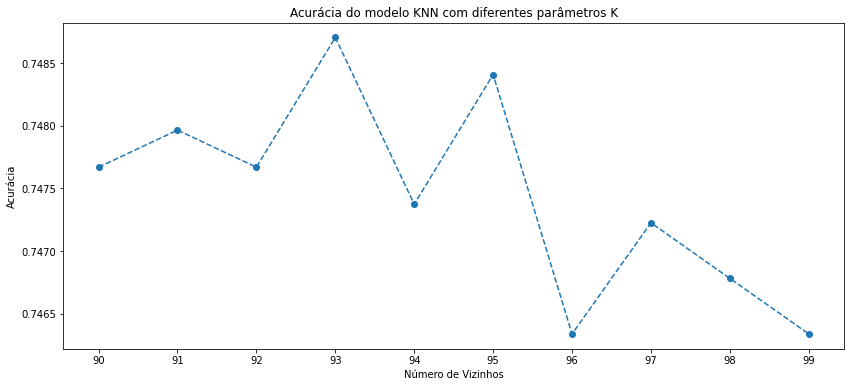

In [ ]:
#Fazer um gráfico para as acurácias encontradas
plt.figure(figsize=(14,6))
plt.plot(k_vizinhos,acc_resultados, '--o') 

plt.ylabel('Acurácia')
plt.xlabel('Número de Vizinhos')
plt.xticks(k_vizinhos);
plt.title('Acurácia do modelo KNN com diferentes parâmetros K');

# Visualizando a matriz de confusão obtida pelo modelo

Aqui verificamos a matriz de confusão obtida pelo modelo, bem como os valores das matrizes geradas por diferentes thresholds de classificação.

A matriz de confusão determina a quantidade de acertos e erros para cada possível caso. Para um limite ou threshold x, temos que se a probabilidade p de um dado d,ser classificado como positivo ou '1' for p >= x, então temos que esse dado vai ser classificado como positivo. 

Visualizaremos também a curva ROC gerada pelo modelo e verificaremos a pontuação AUC produzida pelo modelo também.

[[2570  815]
 [ 883 2489]]


Melhor acurácia: 0.7487050466183217
Resultado AUC SCORE: 0.8295693880089923


Matriz de confusão para threshold =  0.0
[[   0 3385]
 [   0 3372]]


Matriz de confusão para threshold =  0.1
[[ 325 3060]
 [   5 3367]]


Matriz de confusão para threshold =  0.2
[[ 866 2519]
 [  63 3309]]


Matriz de confusão para threshold =  0.30000000000000004
[[1420 1965]
 [ 187 3185]]


Matriz de confusão para threshold =  0.4
[[2082 1303]
 [ 454 2918]]


Matriz de confusão para threshold =  0.5
[[2570  815]
 [ 883 2489]]


Matriz de confusão para threshold =  0.6000000000000001
[[2908  477]
 [1367 2005]]


Matriz de confusão para threshold =  0.7000000000000001
[[3135  250]
 [1896 1476]]


Matriz de confusão para threshold =  0.8
[[3307   78]
 [2526  846]]


Matriz de confusão para threshold =  0.9
[[3379    6]
 [3239  133]]


Matriz de confusão para threshold =  1.0
[[3385    0]
 [3372    0]]




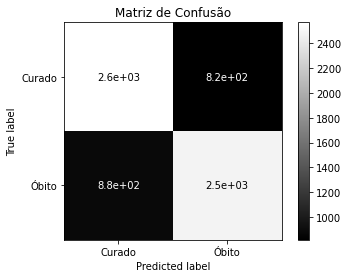

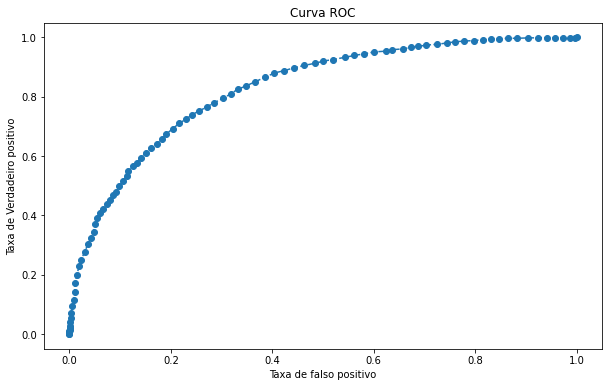

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def modifica_threshold(Y_val, probabilities, threshold):
  new_y_pred = []

  for value in probabilities:
    if value >= threshold:
      new_y_pred.append(1)
    else:
      new_y_pred.append(0)

  new_cm = confusion_matrix(Y_val,new_y_pred)

  return new_cm

#Fazendo o score para o alvo de interesse Evolução = 1
resultado_prob_positivo = resultado_prob[:,1]
#print('Resultado Prob:', resultado_prob)


#Verificando matriz de confusão
target_names = ['Curado', 'Óbito']
cm = confusion_matrix(Y_val,y_pred)
print(cm)
print('\n') 
cm_view = plot_confusion_matrix(model,X_val,Y_val,display_labels=target_names, cmap=plt.cm.binary_r, normalize=None)
cm_view.ax_.set_title('Matriz de Confusão')

#Verificando resultados
#print(acc_resultados)
print("Melhor acurácia:", resultado)
#print('Probabilidades para classificado como óbito:', resultado_prob_positivo)
#print('Y_val:', Y_val)
print('Resultado AUC SCORE:', roc_auc_score(Y_val,resultado_prob_positivo))
print('\n') 

#Plotando gráfico da curva ROC
Taxa_falso_positivo, Taxa_verdadeiro_positivo, _ = roc_curve(Y_val, resultado_prob_positivo)
#print('FP:', Taxa_falso_positivo)
#print('VP:', Taxa_verdadeiro_positivo)

plt.figure(figsize=(10,6))
plt.plot(Taxa_falso_positivo, Taxa_verdadeiro_positivo, '--o')
plt.title('Curva ROC')
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de Verdadeiro positivo');

#Verificando resultado de matrizes de confusão com diferentes thresholds
linespace = np.linspace(0,1.0,num=11,dtype=float)
#print(linespace)

for threshold in linespace:
  new_cm = modifica_threshold(Y_val, resultado_prob_positivo, threshold)
  print('Matriz de confusão para threshold = ',threshold)
  print(new_cm)
  print('\n') 